# Binary Image Classification using CNN Models

# Loading Datasets and building AlexNet

In [16]:
# Importing Libraries
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

Functions to make code reusable

In [5]:
# Function to generate Training images
def train_generator(direc, dim, b_size):
  gen = train_datagen.flow_from_directory(
    direc,
    target_size=(dim,dim),
    batch_size=b_size,
    class_mode="categorical"
  )
  return gen

# Function to generate Validation images
def validation_generator(direc, dim, b_size):
  gen = val_datagen.flow_from_directory(
    direc,
    target_size=(dim,dim),
    batch_size=b_size,
    class_mode="categorical"
  )
  return gen

# Function to plot curve from model history
def plot_curve(hist):
  acc1 = hist.history['accuracy']
  val_acc1 = hist.history['val_accuracy']
  loss1 = hist.history['loss']
  val_loss1 = hist.history['val_loss']

  epochs = range(1, len(loss1)+1)
  plt.plot(epochs, loss1, label='Training loss')
  plt.plot(epochs, val_loss1, label='Validation loss')
  plt.title("Training Loss Vs Validation Loss")
  plt.legend()
  plt.show()

  plt.plot(epochs, acc1, label="Training Accuracy")
  plt.plot(epochs, val_acc1, label="Validation Accuracy")
  plt.title("Training Accuracy Vs Validation Accuracy")
  plt.ylim(0,1)
  plt.legend()
  plt.show()

 Loading and Unzipping Cats and Dogs Dataset

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 16:38:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   269MB/s    in 0.2s    

2022-08-28 16:38:50 (269 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close();

In [8]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

# Flow training images in batches of 25 using train_datagen generator
cat_dog_train_generator = train_generator(train_dir,227,25)

# Flow validation images in batches of 25 using train_datagen generator
cat_dog_val_generator = train_generator(val_dir,227,25)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Loading and Unzipping Horse and Zebra Dataset

Drive Link = https://drive.google.com/drive/folders/1GsA6KhNX5QEwWIykpo6ORMhJdyb4l8jM?usp=sharing

In [22]:
#   // Unzipping HorseZebra Dataset which is stored in my drive 
# Link = https://drive.google.com/drive/folders/1GsA6KhNX5QEwWIykpo6ORMhJdyb4l8jM?usp=sharing
#
#   // This code this executed only once
# local_zip = './drive/MyDrive/DL_dataset/archive.zip'
# zip_ref = zipfile.ZipFile(local_zip,'r')
# zip_ref.extractall('./drive/MyDrive/DL_dataset/HorseZebra')
# zip_ref.close();
#
#   // Folder Structure
#                                                    |---> Horse
#                |---> Train (2400 images)---------->|
#                |                                   |--->Zebra
# Horse-Zebra--->|
#                |                                   |---> Horse
#                |---> Validation (260 images)------>|
#                                                    |--->Zebra

In [10]:
base_dir = './drive/MyDrive/DL_dataset/HorseZebra'

train_dir2 = os.path.join(base_dir,'train')
val_dir2 = os.path.join(base_dir,'validation')

# Flow training images in batches of 25 using train_datagen generator
horse_zebra_train_generator = train_generator(train_dir2,227,24)

# Flow validation images in batches of 25 using train_datagen generator
horse_zebra_val_generator = train_generator(val_dir2,227,20)

Found 2400 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
# Directory with our Training Cat pictures
train_cats_dir = os.path.join(train_dir,'cats')

# Directory with our Training Dog pictures
train_dogs_dir = os.path.join(train_dir,'dogs')

# Directory with our Validation Cat pictures
validation_cats_dir = os.path.join(val_dir,'cats')

# Directory with our Validation Dog pictures
validation_dogs_dir = os.path.join(val_dir,'dogs')


['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


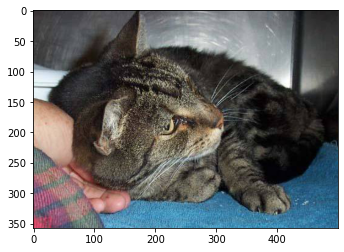

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [ ]:
# Building Alexnet Architechture for cats and dogs dataset

Alexnet_base = tf.keras.Sequential()

actv_fun = tf.keras.layers.LeakyReLU(alpha=0.3)
regularizer = tf.keras.regularizers.l2()

Alexnet_base.add(tf.keras.Input(shape=(227,227,3)))
Alexnet_base.add(tf.keras.layers.Conv2D(96, kernel_size=(11,11), activation = actv_fun, kernel_regularizer = regularizer, strides=(4,4), padding="valid", name="ConvLayer1"))
Alexnet_base.add(tf.keras.layers.BatchNormalization(momentum=0.93, epsilon=0.001))

Alexnet_base.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2, 2), name="PoolLayer1"))
Alexnet_base.add(tf.keras.layers.Conv2D(256, kernel_size=(5,5), activation = actv_fun, kernel_regularizer = regularizer, padding="same", name="ConvLayer2"))
Alexnet_base.add(tf.keras.layers.BatchNormalization(momentum=0.93,epsilon=0.001))

Alexnet_base.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2, 2), name="PoolLayer2"))
Alexnet_base.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), activation = actv_fun, kernel_regularizer = regularizer, padding="same", name="ConvLayer3"))
Alexnet_base.add(tf.keras.layers.BatchNormalization(momentum=0.93,epsilon=0.001))
Alexnet_base.add(tf.keras.layers.Conv2D(384, kernel_size=(3,3), activation = actv_fun, kernel_regularizer = regularizer, padding="same", name="ConvLayer4"))
Alexnet_base.add(tf.keras.layers.BatchNormalization(momentum=0.93,epsilon=0.001))
Alexnet_base.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation = actv_fun, kernel_regularizer = regularizer, padding="same", name="ConvLayer5"))
Alexnet_base.add(tf.keras.layers.BatchNormalization(momentum=0.93,epsilon=0.001))

Alexnet_base.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2, 2), name="PoolLayer3"))

Alexnet_base.add(tf.keras.layers.Flatten())

Alexnet_base.add(tf.keras.layers.Dense(4096, activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer1"))
Alexnet_base.add(tf.keras.layers.Dropout(0.7))
Alexnet_base.add(tf.keras.layers.Dense(4096, activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer2"))
Alexnet_base.add(tf.keras.layers.Dropout(0.5))

Alexnet_base.add(tf.keras.layers.Dense(2, activation="softmax", name="OutputLayer"))

Alexnet_base.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_76 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 27, 27, 96)        0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_77 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 13, 13, 256)     

Many parameters and hyperparameters are optimized to reduce overfitting and increase accuracy

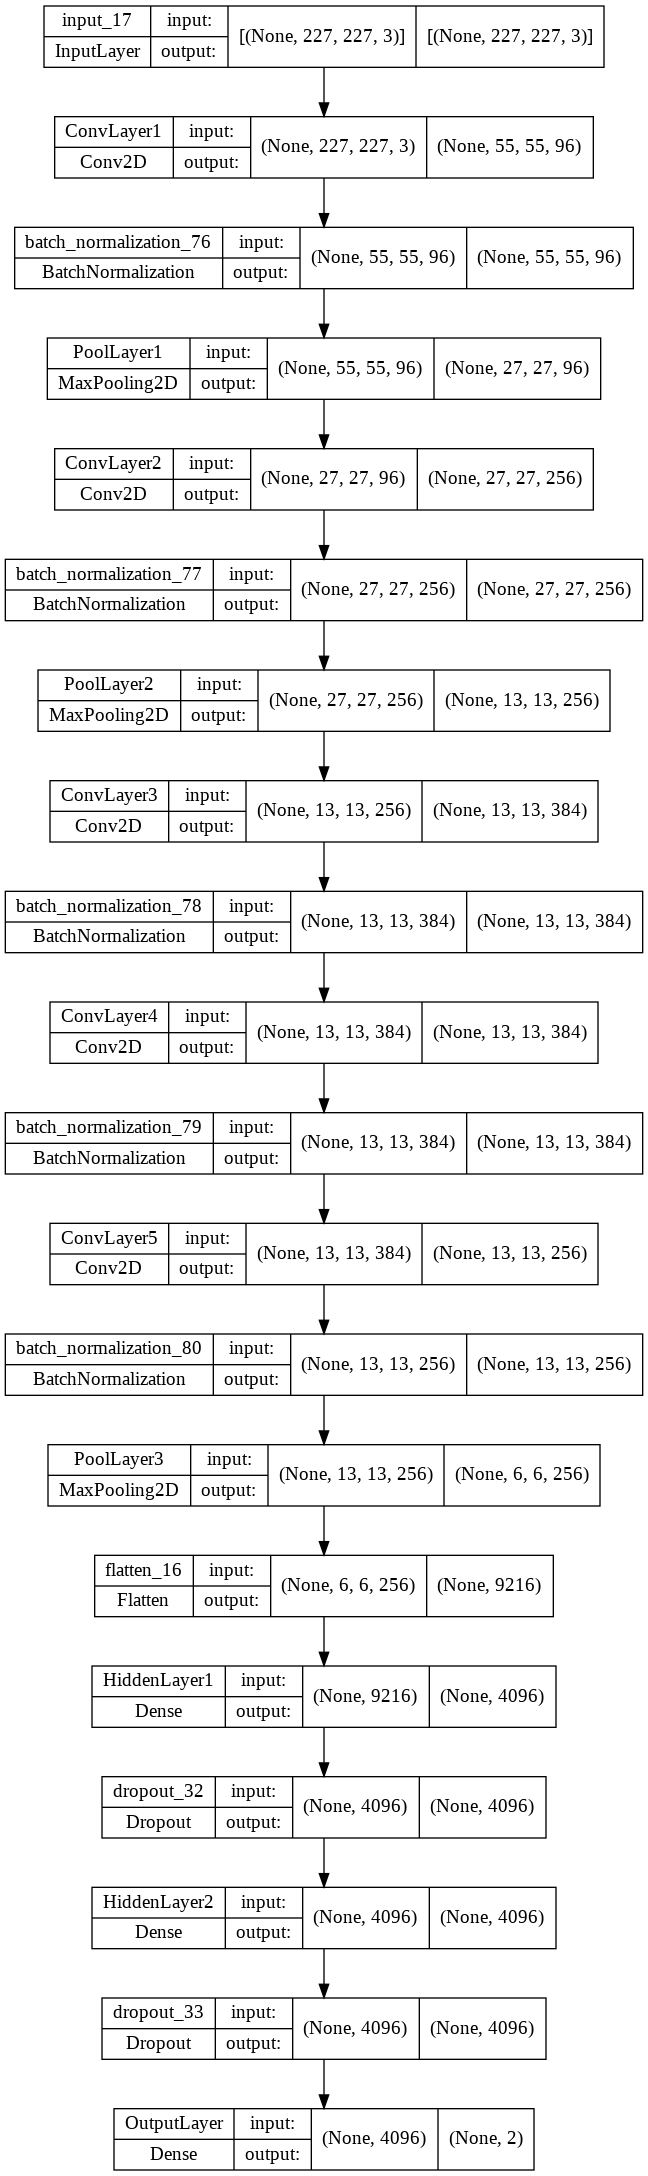

In [ ]:
# Vizualizing the Model
plot_model(Alexnet_base,  show_shapes=True, show_layer_names=True)

Compiling and Fitting AlexNet Model with Cats and Dogs Dataset

In [ ]:
Alexnet_cat_dog = Alexnet_base
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
Alexnet_cat_dog.compile(loss="categorical_crossentropy" , optimizer=opt, metrics=["accuracy"])

history_alexnet_1 = Alexnet_cat_dog.fit(
    cat_dog_train_generator,
    steps_per_epoch=80,
    epochs=20,
    batch_size=32,
    validation_data=cat_dog_val_generator,
    validation_steps=40,
    verbose=1
)

Epoch 1/20
80/80 [==============================] - 39s 138ms/step - loss: 103.7045 - accuracy: 0.5670 - val_loss: 95.9679 - val_accuracy: 0.5460
Epoch 2/20
80/80 [==============================] - 11s 134ms/step - loss: 91.2183 - accuracy: 0.5720 - val_loss: 85.7973 - val_accuracy: 0.6170
Epoch 3/20
80/80 [==============================] - 11s 133ms/step - loss: 82.2116 - accuracy: 0.6200 - val_loss: 77.5448 - val_accuracy: 0.6430
Epoch 4/20
80/80 [==============================] - 11s 134ms/step - loss: 74.7398 - accuracy: 0.6185 - val_loss: 70.8312 - val_accuracy: 0.6590
Epoch 5/20
80/80 [==============================] - 11s 134ms/step - loss: 68.4047 - accuracy: 0.6425 - val_loss: 65.0926 - val_accuracy: 0.6550
Epoch 6/20
80/80 [==============================] - 11s 134ms/step - loss: 62.7478 - accuracy: 0.6675 - val_loss: 59.8163 - val_accuracy: 0.7060
Epoch 7/20
80/80 [==============================] - 11s 134ms/step - loss: 57.6781 - accuracy: 0.6900 - val_loss: 55.0434 - val_a

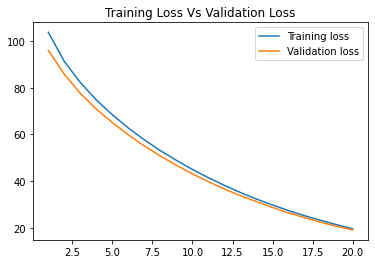

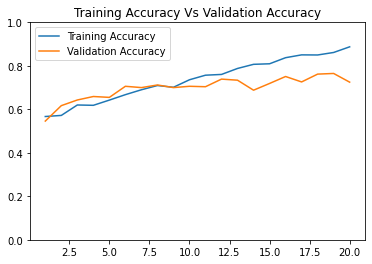

In [ ]:
# Plotting loss and accuracy for training vs validation 
plot_curve(history_alexnet_1)

Loss value is very high compared to other pre-trained models. But the loss curve is smooth.<br>
There is a gap between training and validation accuracy which indicates the model is overfitting

In [ ]:
# Testing the model
# My pet images are used
test_dir = './drive/MyDrive/image'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227,227),
    batch_size=20,
    class_mode="categorical"
)

Found 10 images belonging to 2 classes.


In [ ]:
test1 = Alexnet_cat_dog.evaluate(test_generator)

1/1 [==============================] - 0s 226ms/step - loss: 19.1823 - accuracy: 0.7000


Compiling and Fitting AlexNet Model with Horse and Zebra Dataset

In [ ]:
Alexnet_horse_zebra = Alexnet_base
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
Alexnet_horse_zebra.compile(loss="categorical_crossentropy" , optimizer=opt, metrics=["accuracy"])

history_alexnet_2 = Alexnet_horse_zebra.fit(
    horse_zebra_train_generator,
    steps_per_epoch=100,
    epochs=20,
    batch_size=32,
    validation_data=horse_zebra_val_generator,
    validation_steps=13,
    verbose=1
)

Epoch 1/20
100/100 [==============================] - 13s 119ms/step - loss: 14.2979 - accuracy: 0.8383 - val_loss: 11.4160 - val_accuracy: 0.8846
Epoch 2/20
100/100 [==============================] - 12s 115ms/step - loss: 9.9746 - accuracy: 0.8675 - val_loss: 8.5422 - val_accuracy: 0.8808
Epoch 3/20
100/100 [==============================] - 12s 115ms/step - loss: 7.4733 - accuracy: 0.9062 - val_loss: 6.4604 - val_accuracy: 0.9231
Epoch 4/20
100/100 [==============================] - 12s 115ms/step - loss: 5.6924 - accuracy: 0.9275 - val_loss: 4.9808 - val_accuracy: 0.9154
Epoch 5/20
100/100 [==============================] - 12s 115ms/step - loss: 4.3874 - accuracy: 0.9333 - val_loss: 3.8448 - val_accuracy: 0.9385
Epoch 6/20
100/100 [==============================] - 11s 114ms/step - loss: 3.4490 - accuracy: 0.9396 - val_loss: 3.0466 - val_accuracy: 0.9423
Epoch 7/20
100/100 [==============================] - 12s 116ms/step - loss: 2.7418 - accuracy: 0.9421 - val_loss: 2.4408 - val_

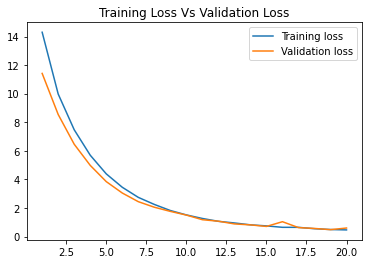

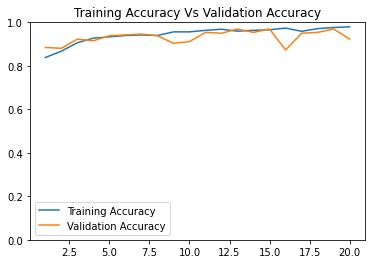

In [ ]:
# Plotting loss and accuracy for training vs validation 
plot_curve(history_alexnet_2)

Here the loss value is less and curve is smooth.<br>
There is a little gap between training and validation accuracy which indicates the model overfits a little. But the accuracy is good.<br>This is a good model.


# 2. Transfer Learning
<a id='vgg'></a>

##VGG-16


In [45]:
vgg_cat_dog_train_generator = train_generator(train_dir,224,25)
vgg_cat_dog_val_generator = train_generator(val_dir,224,25)

vgg_horse_zebra_train_generator = train_generator(train_dir2,224,24)
vgg_horse_zebra_val_generator = train_generator(val_dir2,224,20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [46]:
# Import the VGG16 model
from keras.applications.vgg16 import VGG16
vgg_base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
vgg_base_model.trainable = False #freeze the layers
vgg_base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [47]:
vgg_cats_dogs = tf.keras.Sequential([
    vgg_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
vgg_cats_dogs.summary()

vgg_cats_dogs.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


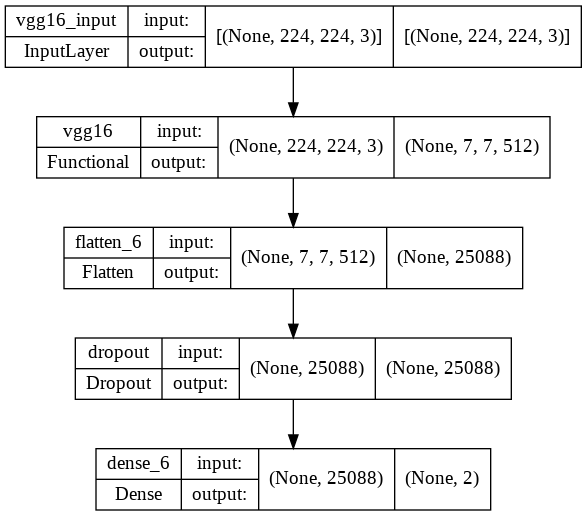

In [48]:
plot_model(vgg_cats_dogs,  show_shapes=True, show_layer_names=True)

In [49]:
history_vgg_1 = vgg_cats_dogs.fit(
      vgg_cat_dog_train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=20,
      batch_size=32,
      validation_data=vgg_cat_dog_val_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
80/80 [==============================] - 19s 208ms/step - loss: 0.7072 - accuracy: 0.6290 - val_loss: 0.4166 - val_accuracy: 0.8220
Epoch 2/20
80/80 [==============================] - 17s 209ms/step - loss: 0.4575 - accuracy: 0.7865 - val_loss: 0.3228 - val_accuracy: 0.8790
Epoch 3/20
80/80 [==============================] - 17s 214ms/step - loss: 0.3647 - accuracy: 0.8380 - val_loss: 0.2883 - val_accuracy: 0.8870
Epoch 4/20
80/80 [==============================] - 17s 216ms/step - loss: 0.3133 - accuracy: 0.8575 - val_loss: 0.2702 - val_accuracy: 0.8920
Epoch 5/20
80/80 [==============================] - 18s 220ms/step - loss: 0.2740 - accuracy: 0.8880 - val_loss: 0.2644 - val_accuracy: 0.8940
Epoch 6/20
80/80 [==============================] - 18s 219ms/step - loss: 0.2405 - accuracy: 0.9010 - val_loss: 0.2514 - val_accuracy: 0.8940
Epoch 7/20
80/80 [==============================] - 17s 218ms/step - loss: 0.2253 - accuracy: 0.9070 - val_loss: 0.2389 - val_accuracy: 0.9060

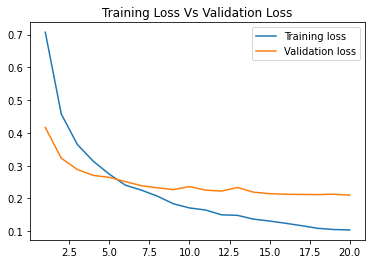

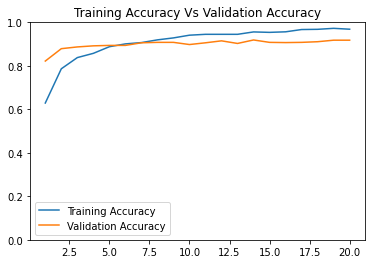

In [50]:
plot_curve(history_vgg_1)

Loss and accuracy curve both has gap in them.
Hence this model overfits. But the accuracy is pretty descent.

In [51]:
vgg_horse_zebra = tf.keras.Sequential([
    vgg_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
vgg_horse_zebra.summary()

vgg_horse_zebra.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


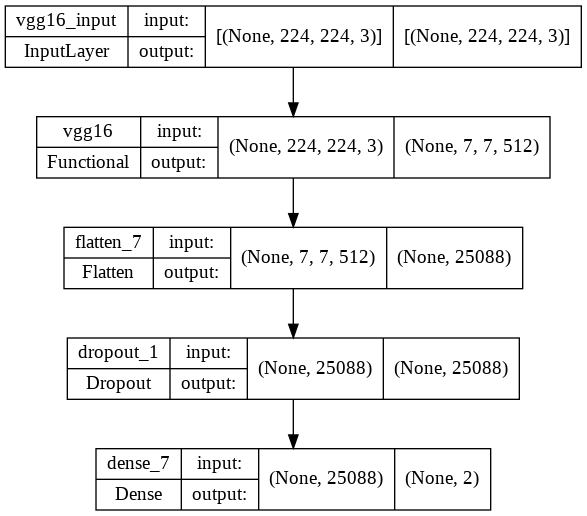

In [52]:
plot_model(vgg_horse_zebra,  show_shapes=True, show_layer_names=True)

In [53]:
history_vgg_2 = vgg_cats_dogs.fit(
      vgg_horse_zebra_train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      batch_size=32,
      validation_data=vgg_horse_zebra_val_generator,
      validation_steps=13,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 20s 181ms/step - loss: 0.5923 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.9077
Epoch 2/20
100/100 [==============================] - 16s 160ms/step - loss: 0.2125 - accuracy: 0.9100 - val_loss: 0.1688 - val_accuracy: 0.9385
Epoch 3/20
100/100 [==============================] - 16s 160ms/step - loss: 0.1602 - accuracy: 0.9388 - val_loss: 0.1428 - val_accuracy: 0.9577
Epoch 4/20
100/100 [==============================] - 16s 160ms/step - loss: 0.1455 - accuracy: 0.9404 - val_loss: 0.1354 - val_accuracy: 0.9615
Epoch 5/20
100/100 [==============================] - 16s 160ms/step - loss: 0.1204 - accuracy: 0.9508 - val_loss: 0.1272 - val_accuracy: 0.9615
Epoch 6/20
100/100 [==============================] - 16s 160ms/step - loss: 0.1093 - accuracy: 0.9596 - val_loss: 0.1239 - val_accuracy: 0.9615
Epoch 7/20
100/100 [==============================] - 16s 160ms/step - loss: 0.1018 - accuracy: 0.9629 - val_loss: 0.1175 - val_ac

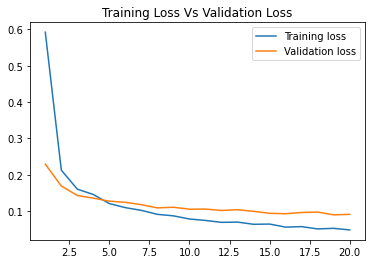

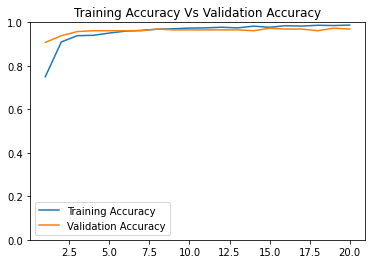

In [54]:
plot_curve(history_vgg_2)

This model overfits a little. But in terms of High Accuracy and low Loss value this is a good model.

##GoogleNet

In [14]:
inception_cat_dog_train_generator = train_generator(train_dir,224,25)
inception_cat_dog_val_generator = train_generator(val_dir,224,25)

inception_horse_zebra_train_generator = train_generator(train_dir2,224,24)
inception_horse_zebra_val_generator = train_generator(val_dir2,224,20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
# Import the InceptionV3 model
from keras.applications.inception_v3 import InceptionV3
inceptionv3_base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
inceptionv3_base_model.trainable = False #freeze the layers
inceptionv3_base_model.summary()

In [13]:
inceptionv3_cats_dogs = tf.keras.Sequential([
    inceptionv3_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
inceptionv3_cats_dogs.summary()

inceptionv3_cats_dogs.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
plot_model(inceptionv3_cats_dogs,  show_shapes=True, show_layer_names=True)

In [15]:
history_inception_1 = inceptionv3_cats_dogs.fit(
      inception_cat_dog_train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=20,
      batch_size=32,
      validation_data=inception_cat_dog_val_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
80/80 [==============================] - 29s 165ms/step - loss: 0.1112 - accuracy: 0.9605 - val_loss: 0.0499 - val_accuracy: 0.9820
Epoch 2/20
80/80 [==============================] - 11s 141ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0435 - val_accuracy: 0.9860
Epoch 3/20
80/80 [==============================] - 12s 153ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9860
Epoch 4/20
80/80 [==============================] - 14s 169ms/step - loss: 9.8226e-04 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9870
Epoch 5/20
80/80 [==============================] - 14s 176ms/step - loss: 6.7296e-04 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9850
Epoch 6/20
80/80 [==============================] - 12s 155ms/step - loss: 5.5507e-04 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9870
Epoch 7/20
80/80 [==============================] - 12s 147ms/step - loss: 4.7161e-04 - accuracy: 1.0000 - val_loss: 0.0417 - val_

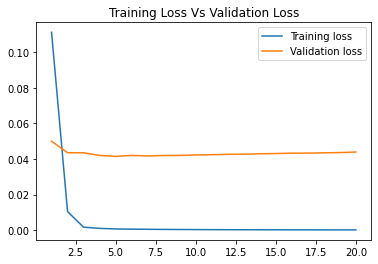

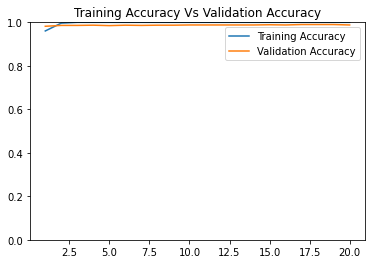

In [19]:
plot_curve(history_inception_1)

This Model has high accuracy and is one of the best model

In [20]:
inceptionv3_horse_zebra = tf.keras.Sequential([
    inceptionv3_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
inceptionv3_horse_zebra.summary()

inceptionv3_horse_zebra.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [24]:
plot_model(inceptionv3_horse_zebra,  show_shapes=True, show_layer_names=True)

In [23]:
history_inception_2 = inceptionv3_horse_zebra.fit(
      inception_horse_zebra_train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      batch_size=32,
      validation_data=inception_horse_zebra_val_generator,
      validation_steps=13,  # 1000 images = batch_size * steps
      verbose=1)

In [ ]:
plot_curve(history_inception_2)

##ResNet50

In [24]:
# Flow training and validation images in batches using image data generator
resnet_cat_dog_train_generator = train_generator(train_dir,224,25)
resnet_cat_dog_val_generator = train_generator(val_dir,224,25)

resnet_horse_zebra_train_generator = train_generator(train_dir2,224,24)
resnet_horse_zebra_val_generator = train_generator(val_dir2,224,20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
# Import the ResNet50 model
from keras.applications.resnet import ResNet50
resnet_base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
resnet_base_model.trainable = False #freeze the layers
resnet_base_model.summary()

In [11]:
resnet_cats_dogs = tf.keras.Sequential([
    resnet_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
resnet_cats_dogs.summary()

resnet_cats_dogs.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


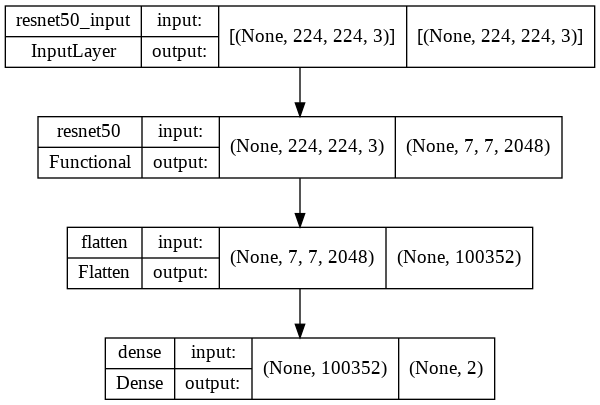

In [12]:
plot_model(resnet_cats_dogs,  show_shapes=True, show_layer_names=True)

In [14]:
history_resnet_1 = resnet_cats_dogs.fit(
      resnet_cat_dog_train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=20,
      batch_size=32,
      validation_data=resnet_cat_dog_val_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
80/80 [==============================] - 27s 167ms/step - loss: 0.7065 - accuracy: 0.5765 - val_loss: 0.6481 - val_accuracy: 0.6290
Epoch 2/20
80/80 [==============================] - 12s 155ms/step - loss: 0.6555 - accuracy: 0.6250 - val_loss: 0.6379 - val_accuracy: 0.6300
Epoch 3/20
80/80 [==============================] - 13s 165ms/step - loss: 0.6277 - accuracy: 0.6490 - val_loss: 0.6503 - val_accuracy: 0.6170
Epoch 4/20
80/80 [==============================] - 12s 153ms/step - loss: 0.5922 - accuracy: 0.6700 - val_loss: 0.6234 - val_accuracy: 0.6520
Epoch 5/20
80/80 [==============================] - 12s 155ms/step - loss: 0.5878 - accuracy: 0.6785 - val_loss: 0.6212 - val_accuracy: 0.6570
Epoch 6/20
80/80 [==============================] - 12s 155ms/step - loss: 0.6001 - accuracy: 0.6705 - val_loss: 0.6484 - val_accuracy: 0.6220
Epoch 7/20
80/80 [==============================] - 14s 180ms/step - loss: 0.5745 - accuracy: 0.6870 - val_loss: 0.6110 - val_accuracy: 0.6660

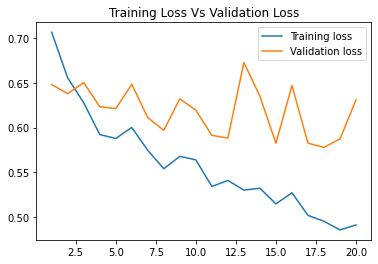

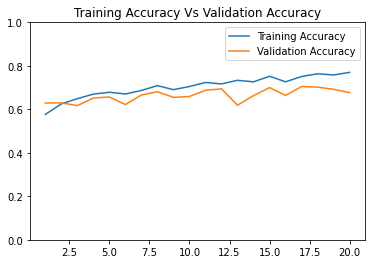

In [16]:
plot_curve(history_resnet_1)

We can see that the above model is overfitting a little as there is gap between training accuracy and validation accuracy, also in the loss function

In [25]:
resnet_horse_zebra = tf.keras.Sequential([
    resnet_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
resnet_horse_zebra.summary()

resnet_horse_zebra.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


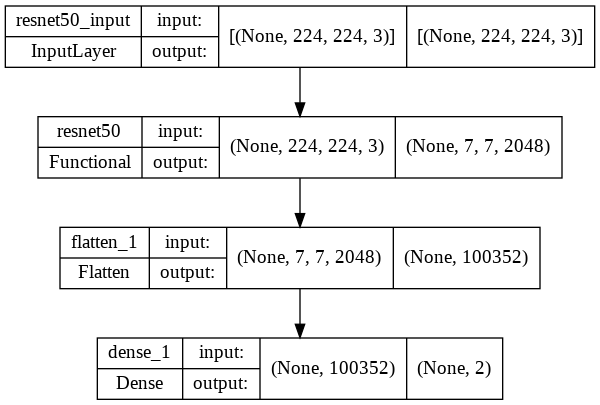

In [26]:
plot_model(resnet_horse_zebra,  show_shapes=True, show_layer_names=True)

In [27]:
history_resnet_2 = resnet_horse_zebra.fit(
      resnet_horse_zebra_train_generator,
      steps_per_epoch=100, 
      epochs=20,
      batch_size=32,
      validation_data=resnet_horse_zebra_val_generator,
      validation_steps=13, 
      verbose=1)

Epoch 1/20
100/100 [==============================] - 17s 138ms/step - loss: 0.5212 - accuracy: 0.7392 - val_loss: 0.4211 - val_accuracy: 0.8269
Epoch 2/20
100/100 [==============================] - 12s 122ms/step - loss: 0.4103 - accuracy: 0.8138 - val_loss: 0.3855 - val_accuracy: 0.8423
Epoch 3/20
100/100 [==============================] - 16s 158ms/step - loss: 0.3747 - accuracy: 0.8267 - val_loss: 0.3504 - val_accuracy: 0.8423
Epoch 4/20
100/100 [==============================] - 12s 124ms/step - loss: 0.3528 - accuracy: 0.8425 - val_loss: 0.3870 - val_accuracy: 0.8346
Epoch 5/20
100/100 [==============================] - 12s 122ms/step - loss: 0.3541 - accuracy: 0.8375 - val_loss: 0.3298 - val_accuracy: 0.8538
Epoch 6/20
100/100 [==============================] - 15s 153ms/step - loss: 0.3086 - accuracy: 0.8679 - val_loss: 0.3121 - val_accuracy: 0.8538
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.3091 - accuracy: 0.8621 - val_loss: 0.4165 - val_ac

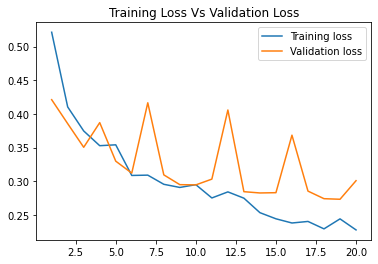

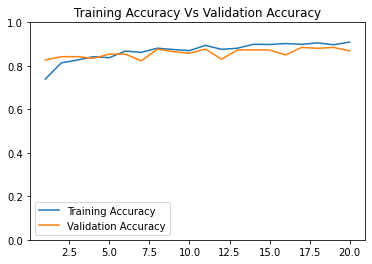

In [28]:
plot_curve(history_resnet_2)

Here the validation loss is fluctuation and there is a slight gap between the training and validation for both loss and accuracy.
The Accuracy is pretty descent

#EfficientNetB0

In [ ]:
# Import the EfficientNetB0 model
from keras.applications.efficientnet import EfficientNetB0
efficientnetb0_base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
efficientnetb0_base_model.trainable = False #freeze the layers
efficientnetb0_base_model.summary()

In [30]:
efficientnetb0_cats_dogs = tf.keras.Sequential([
    efficientnetb0_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
efficientnetb0_cats_dogs.summary()

efficientnetb0_cats_dogs.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


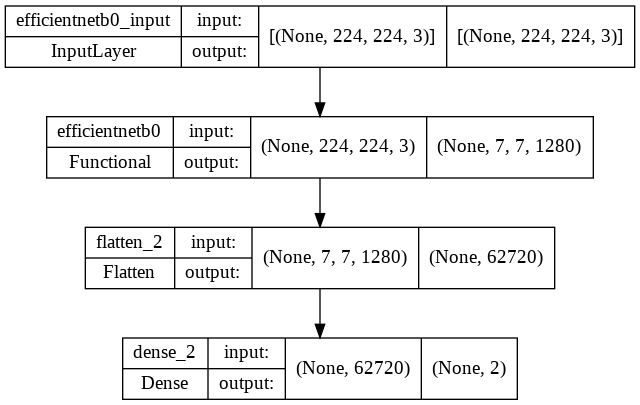

In [31]:
plot_model(efficientnetb0_cats_dogs,  show_shapes=True, show_layer_names=True)

In [32]:
history_efficientnetb0_1 = efficientnetb0_cats_dogs.fit(
      resnet_cat_dog_train_generator, # Same dimensions
      steps_per_epoch=80,  
      epochs=20,
      batch_size=32,
      validation_data=resnet_cat_dog_val_generator,  # Same dimensions
      validation_steps=40,  
      verbose=1)

Epoch 1/20
80/80 [==============================] - 20s 161ms/step - loss: 0.7356 - accuracy: 0.4885 - val_loss: 0.7172 - val_accuracy: 0.5000
Epoch 2/20
80/80 [==============================] - 11s 137ms/step - loss: 0.7273 - accuracy: 0.5010 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/20
80/80 [==============================] - 11s 137ms/step - loss: 0.7930 - accuracy: 0.4935 - val_loss: 0.7621 - val_accuracy: 0.5000
Epoch 4/20
80/80 [==============================] - 11s 137ms/step - loss: 0.7606 - accuracy: 0.4860 - val_loss: 0.7410 - val_accuracy: 0.5000
Epoch 5/20
80/80 [==============================] - 11s 142ms/step - loss: 0.7186 - accuracy: 0.4750 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 6/20
80/80 [==============================] - 11s 137ms/step - loss: 0.7382 - accuracy: 0.5020 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 7/20
80/80 [==============================] - 11s 136ms/step - loss: 0.7658 - accuracy: 0.4985 - val_loss: 0.8941 - val_accuracy: 0.5000

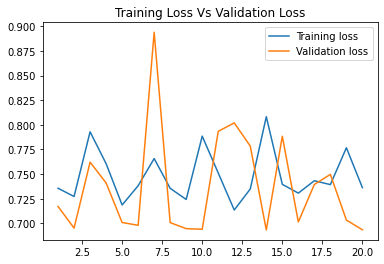

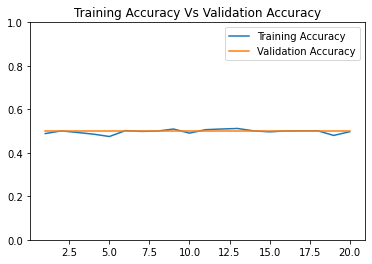

In [33]:
plot_curve(history_efficientnetb0_1)

The loss curve is rough and not a steep slope. And the accuracy curve is overlapping indicating there is no overfitting but the accuracy itself is pretty low.

In [34]:
efficientnetb0_horse_zebra = tf.keras.Sequential([
    efficientnetb0_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
efficientnetb0_horse_zebra.summary()

efficientnetb0_horse_zebra.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [35]:
history_efficientnetb0_2 = efficientnetb0_horse_zebra.fit(
      resnet_horse_zebra_train_generator,
      steps_per_epoch=100, 
      epochs=20,
      batch_size=32,
      validation_data=resnet_horse_zebra_val_generator,
      validation_steps=13, 
      verbose=1)

Epoch 1/20
100/100 [==============================] - 19s 134ms/step - loss: 0.7597 - accuracy: 0.5133 - val_loss: 0.6850 - val_accuracy: 0.7192
Epoch 2/20
100/100 [==============================] - 11s 113ms/step - loss: 0.7137 - accuracy: 0.5292 - val_loss: 0.8229 - val_accuracy: 0.4615
Epoch 3/20
100/100 [==============================] - 12s 119ms/step - loss: 0.7264 - accuracy: 0.5350 - val_loss: 0.8388 - val_accuracy: 0.4615
Epoch 4/20
100/100 [==============================] - 13s 133ms/step - loss: 0.7344 - accuracy: 0.5242 - val_loss: 0.9952 - val_accuracy: 0.5385
Epoch 5/20
100/100 [==============================] - 15s 150ms/step - loss: 0.7316 - accuracy: 0.5367 - val_loss: 0.7064 - val_accuracy: 0.5385
Epoch 6/20
100/100 [==============================] - 14s 139ms/step - loss: 0.6919 - accuracy: 0.5612 - val_loss: 0.6849 - val_accuracy: 0.5385
Epoch 7/20
100/100 [==============================] - 12s 115ms/step - loss: 0.6919 - accuracy: 0.5658 - val_loss: 0.6774 - val_ac

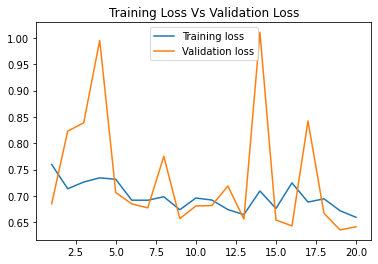

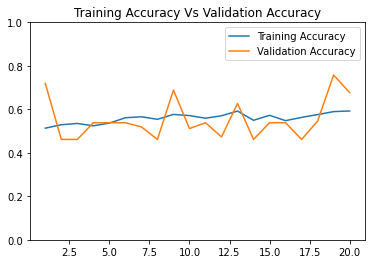

In [36]:
plot_curve(history_efficientnetb0_2)

Here the loss and accuracy curve for training vs validation is rough.
The accuracy is also pretty low

##MobileNetV2

In [ ]:
# Import the MobileNetV2 model
from keras.applications.mobilenet_v2 import MobileNetV2
mobilenetv2_base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
mobilenetv2_base_model.trainable = False #freeze the layers
mobilenetv2_base_model.summary()

In [38]:
mobilenetv2_cats_dogs = tf.keras.Sequential([
    mobilenetv2_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
mobilenetv2_cats_dogs.summary()

mobilenetv2_cats_dogs.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [39]:
history_mobilenetv2_1 = mobilenetv2_cats_dogs.fit(
      resnet_cat_dog_train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=20,
      batch_size=32,
      validation_data=resnet_cat_dog_val_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
80/80 [==============================] - 14s 139ms/step - loss: 0.1293 - accuracy: 0.9585 - val_loss: 0.1023 - val_accuracy: 0.9700
Epoch 2/20
80/80 [==============================] - 11s 136ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.1442 - val_accuracy: 0.9620
Epoch 3/20
80/80 [==============================] - 11s 138ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 4/20
80/80 [==============================] - 11s 132ms/step - loss: 7.3641e-04 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9780
Epoch 5/20
80/80 [==============================] - 12s 151ms/step - loss: 4.8614e-04 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9780
Epoch 6/20
80/80 [==============================] - 11s 133ms/step - loss: 3.9124e-04 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 7/20
80/80 [==============================] - 12s 146ms/step - loss: 3.3306e-04 - accuracy: 1.0000 - val_loss: 0.0787 - val_

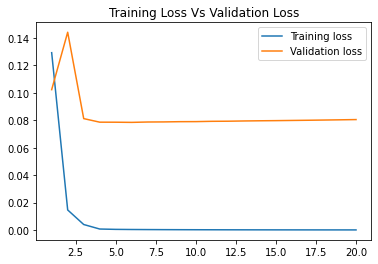

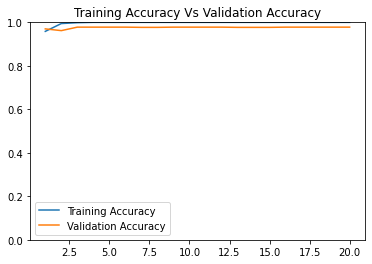

In [40]:
plot_curve(history_mobilenetv2_1)

Here the Loss value is very low compared to other. But the model is overfitting a little since there is a gap between the traing and validation curve. <br>
In terms Highest accuracy and Lowest Loss, this Model is best for Cats and Dogs Dataset.

In [41]:
mobilenetv2_horse_zebra = tf.keras.Sequential([
    mobilenetv2_base_model,
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
mobilenetv2_horse_zebra.summary()

mobilenetv2_horse_zebra.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [42]:
history_mobilenetv2_2 = mobilenetv2_horse_zebra.fit(
      resnet_horse_zebra_train_generator,
      steps_per_epoch=100,
      epochs=20,
      batch_size=32,
      validation_data=resnet_horse_zebra_val_generator,
      validation_steps=13,
      verbose=1)

Epoch 1/20
100/100 [==============================] - 15s 122ms/step - loss: 0.0886 - accuracy: 0.9679 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 2/20
100/100 [==============================] - 11s 112ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0952 - val_accuracy: 0.9808
Epoch 3/20
100/100 [==============================] - 11s 111ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0797 - val_accuracy: 0.9885
Epoch 4/20
100/100 [==============================] - 11s 112ms/step - loss: 3.5125e-04 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9885
Epoch 5/20
100/100 [==============================] - 11s 113ms/step - loss: 2.7402e-04 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9885
Epoch 6/20
100/100 [==============================] - 11s 111ms/step - loss: 2.2724e-04 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9885
Epoch 7/20
100/100 [==============================] - 11s 113ms/step - loss: 1.9468e-04 - accuracy: 1.0000 - val_loss:

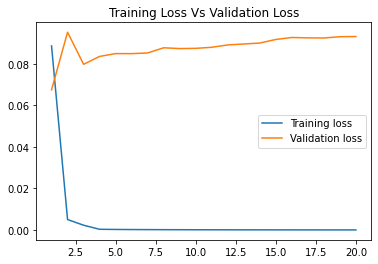

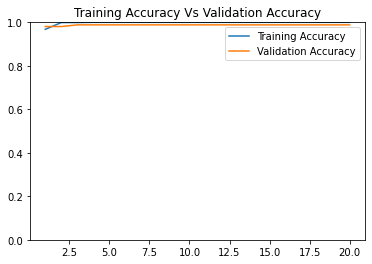

In [43]:
plot_curve(history_mobilenetv2_2)

Here too the Loss value is very low compared to other models. <br>
In terms Highest accuracy and Lowest Loss, this Model is best for Horse and Zebra Dataset.